In [1181]:
using FFTW
using DSP
using Plots
using Distributions

In [1182]:
include("i_state_dsn_pedigree_triat.jl")

Main.i_state_dsn_pedigree_trait

In [1210]:
pop = i_state_dsn_pedigree_trait.init_population(7, [0.9,0.9,0.9,0.9,0.7,0.6,0.2], [0.0,0.0,0.2,0.3,0.3,0.3,0.2],
5 , 1, 0, 0.02, -5, 10.1, 0.1,5, 1)
print(" ")

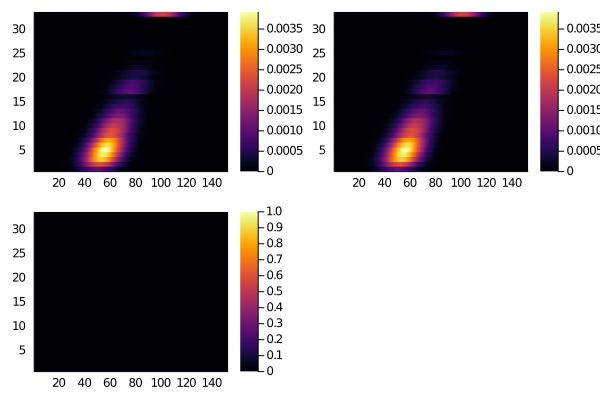

In [1224]:
p1 = Plots.heatmap(pop.trait[2])
t = copy(pop.trait[2])
for i in 1:2
    # reproduction 
    dsn,r = i_state_dsn_pedigree_trait.reproduction(pop)
    
    # selection 
    dsn, N = i_state_dsn_pedigree_trait.selection(dsn, 1, pop)
    
    # density dependence
    N = i_state_dsn_pedigree_trait.recruitment(N, pop)
    
    # immigration 
    d = Distributions.Normal(5.0,1.0)
    dsn_im = pdf.(d,pop.grid_z)
    dsn_im = dsn_im ./ sum(dsn_im )
    dsn, N = i_state_dsn_pedigree_trait.immigration(dsn, N, dsn_im, 0.05,pop)
    
    # add juviniles 
    i_state_dsn_pedigree_trait.ageing!(pop, 1, dsn)
    
end
p2 = Plots.heatmap(pop.trait[4])
p3 = Plots.heatmap(t.-pop.trait[4])
plot(p1,p2,p3)

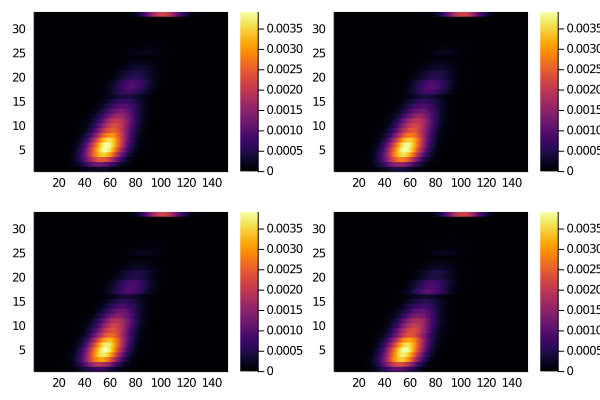

In [1225]:

p1 = Plots.heatmap(pop.trait[1])
p2 = Plots.heatmap(pop.trait[2])
p3 = Plots.heatmap(pop.trait[3])
p4 = Plots.heatmap(pop.trait[4])
plot(p1,p2,p3,p4)

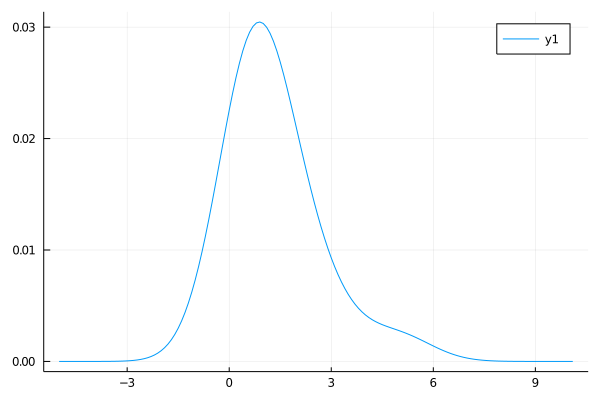

In [1226]:
Plots.plot(pop.grid_z,transpose(mapslices(sum,pop.trait[1], dims = 1)))

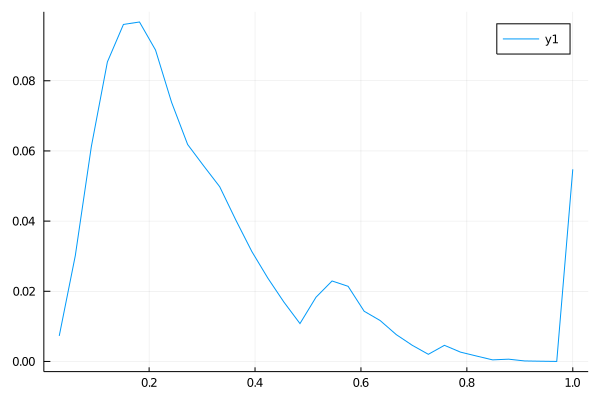

In [1227]:
Plots.plot(pop.grid_p./33,mapslices(sum,pop.trait[1], dims = 2))

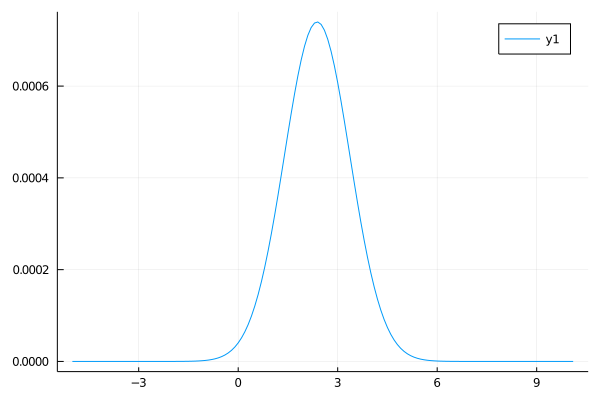

In [1229]:
Plots.plot(pop.grid_z,pop.trait[1][17,:])